In [1]:
%pip install -r ../requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

<hr style="border:2px solid gray">

## Problem Formulation:

In this project, we utilise the Diagnostic Wisconsin Breast Cancer Database (found at: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and the decision tree binary classification model to predict whether a tumor is malignant (cancerous) or benign (non-cancerous). The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Breast cancer is one of the most common forms of cancers and is the leading cause for cancer-related death among women, meaning that accurately identifying whether a cancer is malignant or benign as early as possible is vital. 

In [3]:
# read and display the dataframe
df = pd.read_csv("../data/wdbc.data")
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


As can be seen in the dataframe, the data does not include the column names. Therefore, we will add the column names to continue with the classification.

<hr style="border:2px solid gray">

## Data preparation and feature engineering:

In [4]:
# add names to columns
df.columns = ["ID", "Diagnosis",
           "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
           "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
           "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

In [5]:
df.info

<bound method DataFrame.info of            ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842517         M    20.57     17.77      132.90  1326.0      0.08474   
1    84300903         M    19.69     21.25      130.00  1203.0      0.10960   
2    84348301         M    11.42     20.38       77.58   386.1      0.14250   
3    84358402         M    20.29     14.34      135.10  1297.0      0.10030   
4      843786         M    12.45     15.70       82.57   477.1      0.12780   
..        ...       ...      ...       ...         ...     ...          ...   
563    926424         M    21.56     22.39      142.00  1479.0      0.11100   
564    926682         M    20.13     28.25      131.20  1261.0      0.09780   
565    926954         M    16.60     28.08      108.30   858.1      0.08455   
566    927241         M    20.60     29.33      140.10  1265.0      0.11780   
567     92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  

In [6]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# check for missing values
print(df.isnull().sum())

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [8]:
# drop id column
df = df.drop(columns=["ID"])

We drop the "ID" column as this is merely just an identifier and holds no predictive value, making it irrelevant to the classification.

In [9]:
# convert malignant and benign to 1 and 0
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

We represent malignant cases as 1 and benign cases as 0 as machine learning models require numerical input. 

In [10]:
features = df.drop(columns=["Diagnosis"])
target  = df["Diagnosis"]

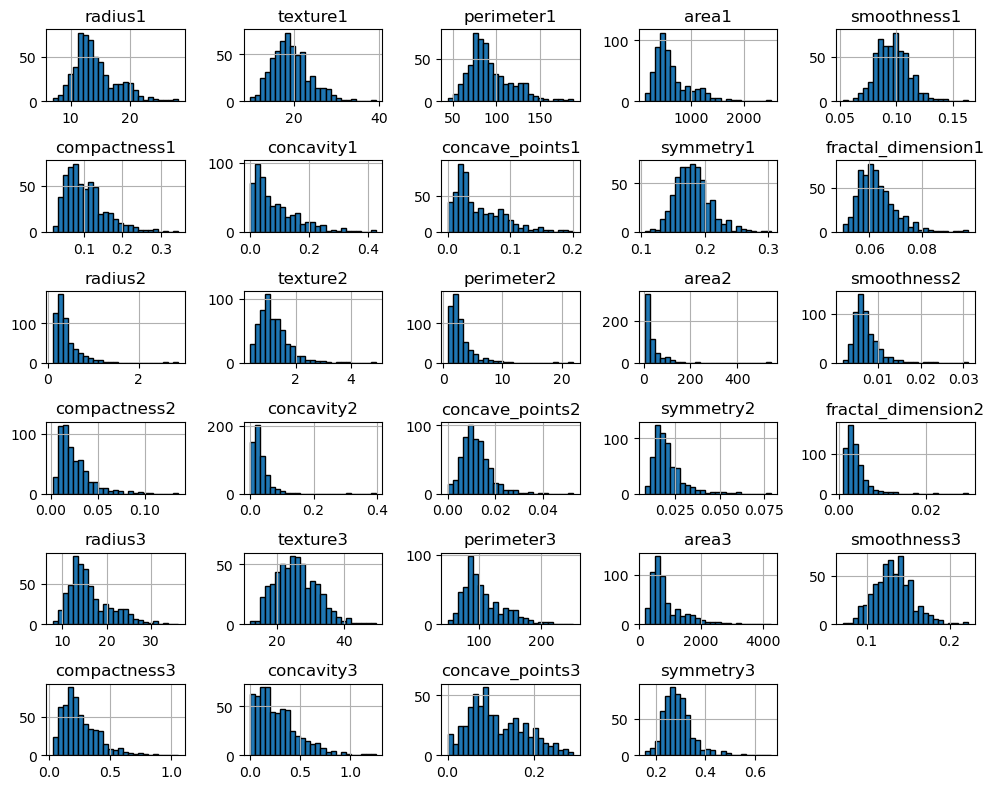

In [11]:
# plot histograms of each feature to visualise the distribution of data
axes = features.iloc[:, :-1].hist(figsize=(10,8), bins=25, edgecolor="black")
plt.tight_layout()
plt.show()

As seen in the histograms above, most of the features are right-skewed (or positively skewed), indicated by the extended tail on the right of the distribution. Additionally, the different variations of the features seem to hold relatively similar shapes, indicating multicollinearity between features. We will remove the outliers by calculating the z-scores and removing all data outside of 3-zscores from the mean. We chose this number as 99.7% of the data falls inside this range for a normal distribution and data outside of 3-zscores is often considered the standard threshold for outliers. 

In [12]:
# calculate z scores for each feature and drop outliers (3 z-scores)
z_scores = stats.zscore(features)
df = df[(z_scores < 3).all(axis=1)]

print(df.shape[0])

495


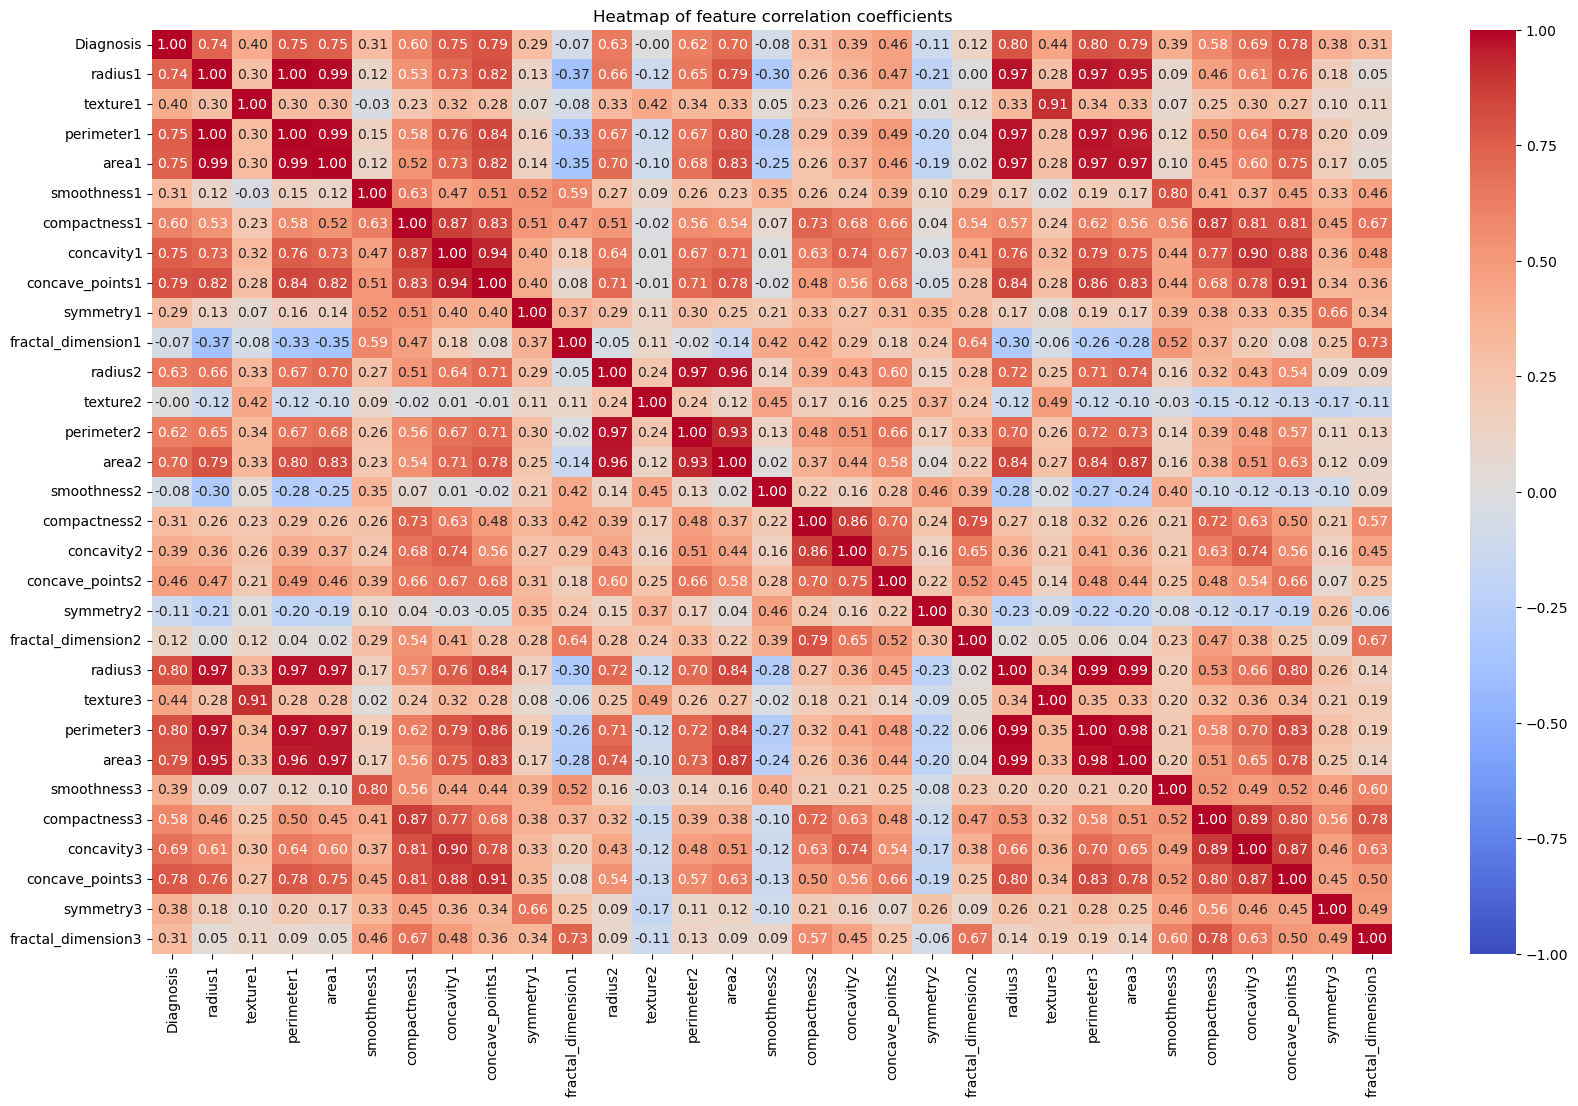

In [13]:
# calculate correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of feature correlation coefficients")
plt.show()

From the heatmap, to avoid the issue of multicollinearity, we will remove features that are highly correlated with eachother. This is as, highly correlated features often give very similar information, making them redundant. Additionally, they can lead to multicollinearity issues, which in turn can make it hard for the model to interpret which features are actually important. We will denote highly correlated features by identifying highly correlated individual features (correlation coefficients greater than ±0.90) and then looking at the surrounding cluster of features, keeping the feature most correlated with the target (Diagnosis). However, in some cases, particularly when the correlation of each feature to the target class is very similar, we may use our intuition, choosing the most interpretable feature of the cluster. 

The first cluster identified was radius1, perimeter1 and area1, each having correlation coefficients around 1.0, indicating a strong dependence one another. This is as, in this context, area is ~radius^2 and the perimeter is derived from radius. Due to this, we keep radius of the three features, as each of the features are very similarly correlated to diagnosis (within 0.01) and radius is the most fundamental of the three. Furthermore, radius2, perimeter2, area2 and radius3, perimeter3, area3 were all also strongly correlated amongst themselves, all having correlation coefficients greater than 0.90. We kept radius2 and radius3 from each cluster due to the same reasoning we used for keeping radius1. 

The second cluster identified was compactness1, concavity1 and concave_points1, with concave_points1 and concavity1 having a very strong correlation (0.94), whilst also both being strongly correlated to compactness1 (having correlation coefficients of 0.83 and 0.87, respectively). We kept concave_points1 as it had the best correlation with the target class, having a correlation coefficient of 0.79, compared to 0.60 and 0.75 for compactness1 and concavity1, respectively. Additionally, compactness3, concavity3 and concave_points3 all have correlation coefficients ~0.90 (0.80, 0.87, 0.89). We keep concave_points3 as it has a significantly stronger correlation with the target class than the other two features, having a correlation coefficient of 0.78, in comparison to 0.58 and 0.69 for compactness3 and concavity3, respectively.

In addition to dropping multicollinear features, we will also drop individual features with low correlation to the target class. This is features with low correlation to the target class often have little to no linear relationship with the target class and therefore provide no help when attempting to distinguish between the two classes. Moreover, these features can negatively impact the model, acting as noise and providing irrelevant patterns, increasing the risk of overfitting. We remove features with a correlation coefficient to the target class of less than ~±0.10. This results in the removal of fractal_dimension1 (-0.07), texture2 (-0.00), smoothness2 (-0.08), symmetry2 (-0.11), fractal_dimension2 (0.12).

In [14]:
# remove redundant and collinear features
final_features = df.drop(columns=["Diagnosis",
                                  "perimeter1", "area1",
                                  "perimeter2", "area2",
                                  "perimeter3", "area3",
                                  "compactness1", "concavity1",
                                  "compactness3", "concavity3",
                                  "fractal_dimension1", "texture2", "smoothness2", "symmetry2", "fractal_dimension2"])

target = df["Diagnosis"]

In [15]:
final_features.describe()

,radius1,texture1,smoothness1,concave_points1,symmetry1,radius2,compactness2,concavity2,concave_points2,radius3,texture3,smoothness3,concave_points3,symmetry3,fractal_dimension3
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,13.855368,18.898505,0.094981,0.043185,0.177529,0.365688,0.022104,0.026976,0.010916,15.828848,25.152848,0.130697,0.106254,0.283407,0.081405
std,3.055114,3.973928,0.012962,0.032600,0.023261,0.204194,0.012684,0.017728,0.004858,4.139242,5.666463,0.021120,0.058296,0.048921,0.014392
min,6.981000,9.710000,0.052630,0.000000,0.116700,0.114400,0.002252,0.000000,0.000000,7.930000,12.020000,0.081250,0.000000,0.156500,0.055040
25%,11.740000,16.000000,0.085205,0.019420,0.160450,0.224750,0.012505,0.014285,0.007423,13.050000,20.845000,0.115500,0.062960,0.248750,0.070820
50%,13.210000,18.580000,0.094460,0.030680,0.177000,0.303700,0.018850,0.023220,0.010430,14.770000,25.110000,0.130000,0.091860,0.278500,0.078730
75%,15.290000,21.470000,0.103700,0.062770,0.192950,0.428750,0.029720,0.037250,0.013700,17.720000,28.900000,0.143550,0.148900,0.311150,0.089710
max,23.270000,30.720000,0.137100,0.156200,0.254000,1.214000,0.074710,0.111400,0.028530,28.190000,41.610000,0.190900,0.270100,0.472400,0.134100


In [16]:
# reindex features and target class after filtering
target = target[final_features.index]

final_features = final_features.reset_index(drop=True)
target = target.reset_index(drop=True)

In [17]:
# check target class balance
print(target.value_counts())

Diagnosis
0    333
1    162
Name: count, dtype: int64


The dataset is somewhat imbalanced, being ~67% benign bases. This can cause the machine learning model to overpredict benign cases to improve the overall accuracy of the model at the cost of correctly classifying malignant cases. Misclassfying malignant cases (false negatives) is extremely dangerous malignant cases are potentailly life threatening and require further tests and treatment as early as possible. Whilst on the other hand, misclassifying a benign case (false positives) is not life threatening and will at worst lead to unnecessary tests. 

<hr style="border:2px solid gray">

## Model selection and training:

We chose decision tree as our classifier for multiple reasons. Firstly, with the visualisation of the decision tree, it is highly interpretable, allowing us to follow the path leading to each prediction. Furthermore, unlike SVM and logistic regression, decision trees do not need the features to be scaled. This is relevant to our dataset as it's features, such as the radius and fractal_dimension, vary significantly in range. Finally, after the removal of outliers, our dataframe only contains 495 samples. The small dataframe means that the decision tree can be trained quickly, allowing for more hyperparameter training, whilst complex models like neural networks would take longer and would potentially overfit the data. 

A decision tree is made up of a root node, leaf-nodes and non-leaf nodes, where the root node denotes the inital split, each leaf-node contains a prediction, each non-leaf node contains a condition, resulting in a split. It begins at the root node, starting with the feature that best separates the classes, before continuing with more splits with other features. The efficiency of a split is is based on either the "gini impurity" or "entropy". These are both metrics for information 
gain or maximum decrease of impurit. The tree continues until either all samples in a node belong to one class or a condition is met (i.e. max tree depth or min samples per leaf). y

In [18]:
# split the data into test and train sets
Xtrain, Xtest, ytrain, ytest = train_test_split(final_features, target, test_size=0.25, random_state=2)
Xtrain.shape, Xtest.shape

((371, 15), (124, 15))

In [19]:
# fit the training data to the decision tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(Xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


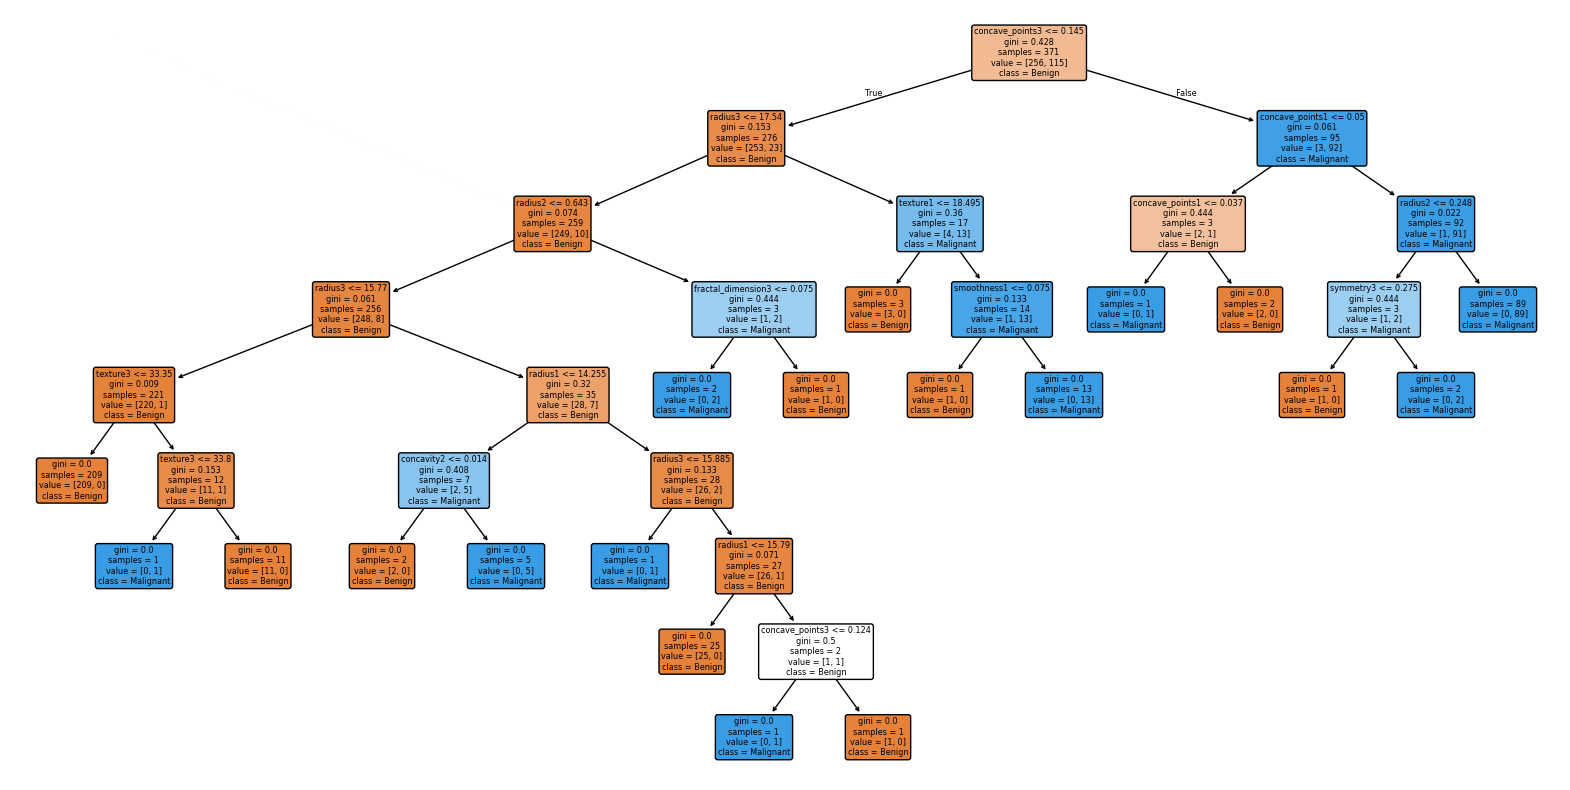

In [20]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=Xtrain.columns, class_names=["Benign", "Malignant"], rounded=True)
plt.show()

In [21]:
print(f"Number of nodes: {dt.tree_.node_count}")

Number of nodes: 37


The low number of nodes is positive as it indicates that the tree is relatively simple, meaning the data is less likely to be overfitted. 

In [22]:
# predict class labels for test and train data
train_prediction = dt.predict(Xtrain)
test_prediction = dt.predict(Xtest)

# calculate metrics to evaluate model performance
train_accuracy = metrics.accuracy_score(ytrain, train_prediction)
test_accuracy = metrics.accuracy_score(ytest, test_prediction)

train_precision = metrics.precision_score(ytrain, train_prediction)
test_precision = metrics.precision_score(ytest, test_prediction)

train_recall = metrics.recall_score(ytrain, train_prediction)
test_recall = metrics.recall_score(ytest, test_prediction)

print("The accuracy of the test set is {:.3f}".format(test_accuracy))
print("The accuracy of the train set is {:.3f}\n".format(train_accuracy))
print("The precision of the test set is {:.3f}".format(test_precision))
print("The precision of the train set is {:.3f}\n".format(train_precision))
print("The recall of the test set is {:.3f}".format(test_recall))
print("The recall of the train set is {:.3f}".format(train_recall))

The accuracy of the test set is 0.879
The accuracy of the train set is 1.000

The precision of the test set is 0.848
The precision of the train set is 1.000

The recall of the test set is 0.830
The recall of the train set is 1.000


Our train scores are all 1.0, indicating that the model has essentially memorised the train data, rather than learning the nuanced patterns in the data, clearly overfitting. Despite this, the model still returns relatively good test scores, having a test accuracy of 0.879, indicating that, overall, the model predicts well. Additionally, the test precision and recall scores are good, with values of 0.848 and 0.830, respectively, meaning the number of false positives and false negatives were low. This is shown below in the confusion matrix. However, these scores can be improved and the issue of overfitting the train data can be solved by applying a cross validation and performing hyperparameter tuning to prune the tree.

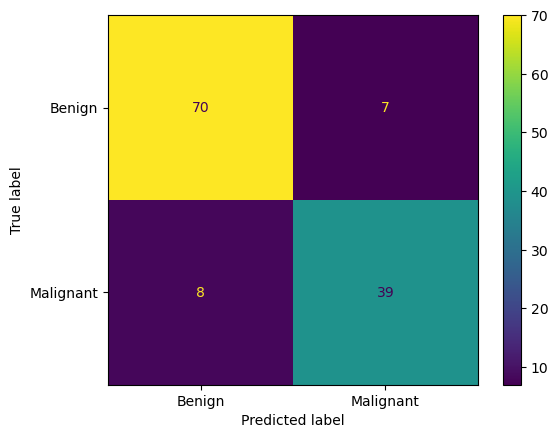

In [23]:
# plot confusion matrix of decision tree
dt_cm = metrics.confusion_matrix(ytest, test_prediction, labels=dt.classes_)
dt_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                      display_labels=["Benign", "Malignant"])
dt_disp.plot()

<hr style="border:2px solid gray">

## Model evaluation:

In [24]:
# split data into 5 equal folds maintaining same class distribution
cv = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)

We chose to use the stratified KFold cross-validation as it shuffles the data whilst also preserving the class distribution in each fold. This is relevant for this classification as our dataframe has a noticebale class imbalance, meaning without the stratified cross-validation some folds may end up with very little to none of the minority class. 

In [25]:
for train, test in cv.split(final_features, target): 
    print("train -  {}   |   test -  {}".format(np.bincount(target.loc[train]), np.bincount(target.loc[test])))

train -  [267 129]   |   test -  [66 33]
train -  [267 129]   |   test -  [66 33]
train -  [266 130]   |   test -  [67 32]
train -  [266 130]   |   test -  [67 32]
train -  [266 130]   |   test -  [67 32]


In [26]:
# calculate metrics to evaluate model performance with cross-validation method
cv_accuracy_scores = cross_validate(dt, final_features, target, cv=cv, scoring="accuracy", return_train_score=True)
accuracy_train = cv_accuracy_scores["train_score"]
accuracy_test = cv_accuracy_scores["test_score"]

cv_recall_scores = cross_validate(dt, final_features, target, cv=cv, scoring="recall", return_train_score=True)
recall_train = cv_recall_scores["train_score"]
recall_test = cv_recall_scores["test_score"]

cv_precision_scores = cross_validate(dt, final_features, target, cv=cv, scoring="precision", return_train_score=True)
precision_train = cv_precision_scores["train_score"]
precision_test = cv_precision_scores["test_score"]

print(f"Stratified KFold cross-validation:\n")
print(f"Accuracy scores:\nTrain\nMean: {np.mean(accuracy_train):.3f}, Standard Deviation: {np.std(accuracy_train):.3f}\nTest\nMean: {np.mean(accuracy_test):.3f}, Standard Deviation: {np.std(accuracy_test):.3f}\n")
print(f"Recall scores:\nTrain\nMean: {np.mean(recall_train):.3f}, Standard Deviation: {np.std(recall_train):.3f}\nTest\nMean: {np.mean(recall_test):.3f}, Standard Deviation: {np.std(recall_test):.3f}\n")
print(f"Precision scores:\nTrain\nMean: {np.mean(precision_train):.3f}, Standard Deviation: {np.std(precision_train):.3f}\nTest\nMean: {np.mean(precision_test):.3f}, Standard Deviation: {np.std(precision_test):.3f}")

Stratified KFold cross-validation:

Accuracy scores:
Train
Mean: 1.000, Standard Deviation: 0.000
Test
Mean: 0.931, Standard Deviation: 0.013

Recall scores:
Train
Mean: 1.000, Standard Deviation: 0.000
Test
Mean: 0.889, Standard Deviation: 0.046

Precision scores:
Train
Mean: 1.000, Standard Deviation: 0.000
Test
Mean: 0.901, Standard Deviation: 0.019


Applying the cross-validation led to a noticeable improvement in each of the metrics, with the test accuracy going from 0.879 -> 0.931, the test recall going from 0.830 -> 0.889, the test precision going from 0.848 -> to 0.901. Additionally, there is a low standard deviation, meaning the model's predictions are consistent over all folds. However, the overfitting issue is still evident in the train metrics all being 1.0. 

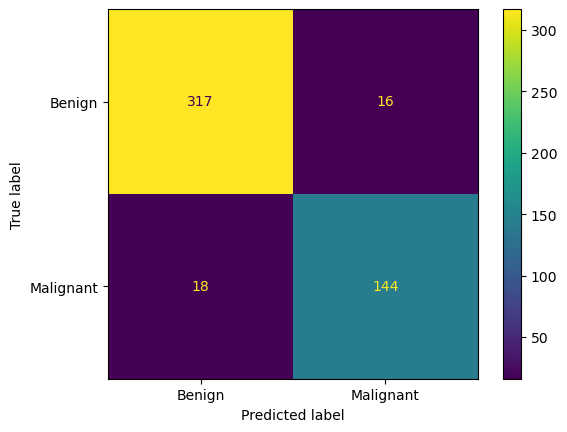

In [27]:
# produce confusion matrix for cross-validation predictions (overall dataset)
ypred_cv = cross_val_predict(dt, final_features, target, cv=cv)
cm_cv = metrics.confusion_matrix(target, ypred_cv)
disp_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=["Benign", "Malignant"])
disp_cm.plot()

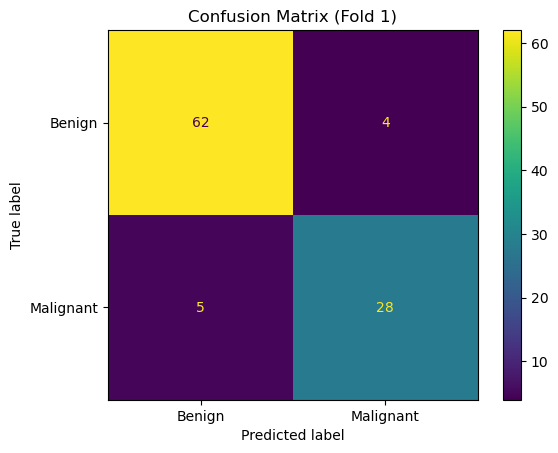

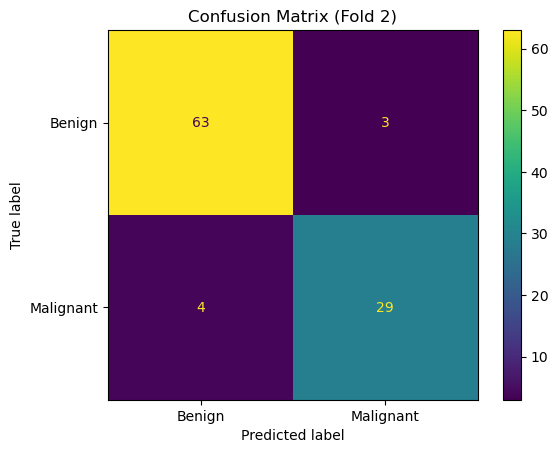

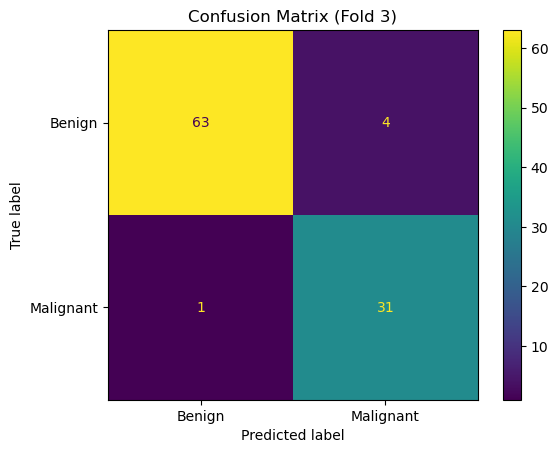

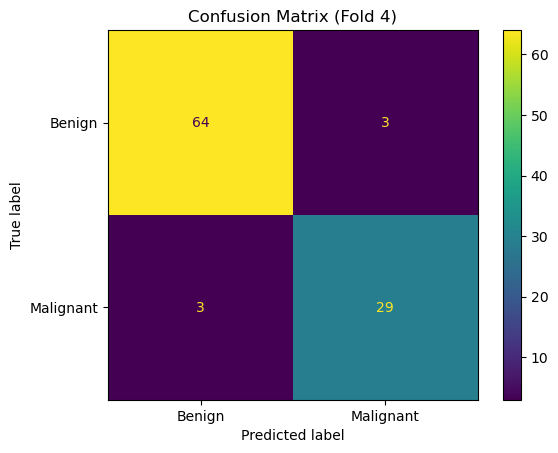

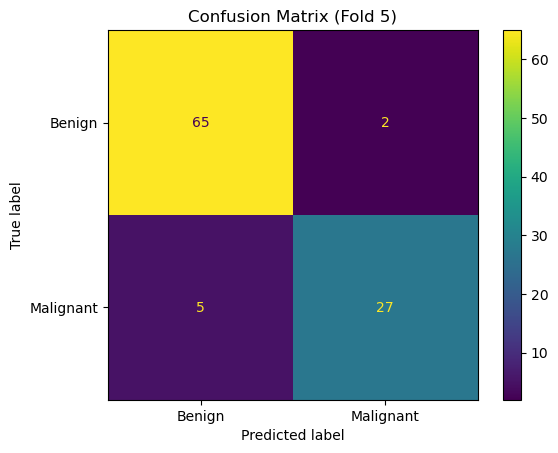

In [28]:
# produce confusion matrices for each cross-validation fold
for fold, (train, test) in enumerate(cv.split(final_features, target), 1):
    Xtrain_fold, Xtest_fold = final_features.iloc[train], final_features.iloc[test]
    ytrain_fold, ytest_fold = target.iloc[train], target.iloc[test]

    dt.fit(Xtrain_fold, ytrain_fold)
    ypred_fold = dt.predict(Xtest_fold)
    
    fold_cm = metrics.confusion_matrix(ytest_fold, ypred_fold)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=fold_cm, display_labels=["Benign", "Malignant"])
    disp.plot()
    plt.title(f"Confusion Matrix (Fold {fold})")
    plt.show()

<hr style="border:2px solid gray">

## Model tuning: 

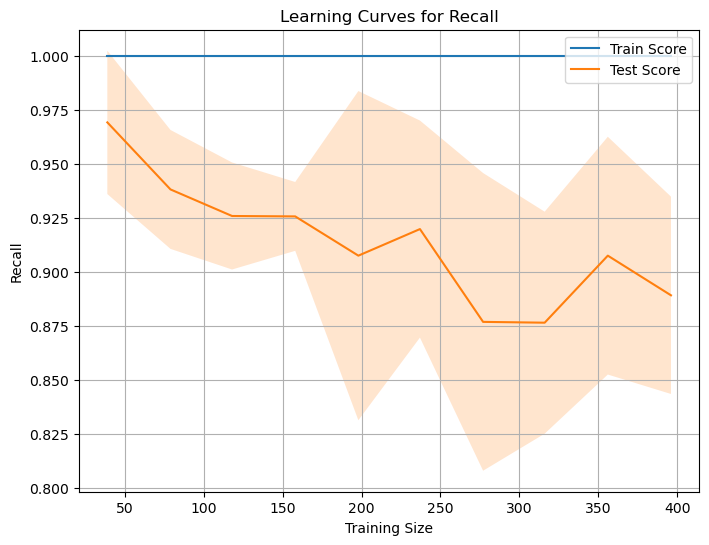

In [29]:
# scale the data using the pipeline and compure the learning curves for the decision tree
dt_pipeline = Pipeline([("scalar", StandardScaler()), ("classifier", dt)])

train_sizes, train_scores, test_scores = learning_curve(dt_pipeline, final_features, target, cv=cv, scoring="recall", train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2)
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.2)
plt.xlabel("Training Size")
plt.ylabel("Recall")
plt.title("Learning Curves for Recall")
plt.legend(loc=1)
plt.grid()
plt.show()

We began by plotting the learning curve of the dataset before any tuning had taken place in order to be able to visually compare the results. As seen in the graph, the training set overfitting can be seen, with a recall of 1.0 for all training sizes. The overfitting of the training data is most likely the cause of the instability of the recall score as the training size increases. We chose to perform the learning curves and grid search for the recall score, as recall is defined as the number of positive cases correctly classified. As previously stated, correctly classifying malignant cases is vital as when a tumor is cancerous it can be life threatening and needs treatment at the earliest possible chance. We continued by executing a grid search in order to find the best parameters to tune the model and find the highest scores for our metrics. Additionally, as the dataset is small we can perform a more extensive grid search. 

In [30]:
# peform a grid search using the parameters listed
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(dt, param_grid, cv=cv, scoring="recall", n_jobs=-1, verbose=1)

grid_search.fit(final_features, target)

print(f"\nBest Hyperparameters: {grid_search.best_params_}\nBest Recall Score: {grid_search.best_score_:.3F}")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Recall Score: 0.938


When performing the grid search, for "max_depth" we chose a mix of lower tree depths (2-5), which could help against overfitting, and higher tree depths (6-10), which allows the model to capture the more complex relationships in the dataset. We also had "None" as an option, allowing the tree to grow without restriction. For "min_samples_split" we again had a variation of higher and lower values, with higher values (10-20) allowing the data to generalise better (as it cannot be split into such small samples) and lower values (2-5) which allow the tree to continue splitting even with very samples and go much deeper. For "min_samples_leaf", smaller values, such as 1, allow the tree to grow more branches, whereas larger numbers, such as 10, force the model to remain simplistic by limiting the number of splits. Finally, for "criterion", this measures the quality of each split.

In [31]:
# tune the decision tree classifier using the hyperparameters from the grid search
tuned_dt = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=3)
tuned_dt.fit(Xtrain, ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


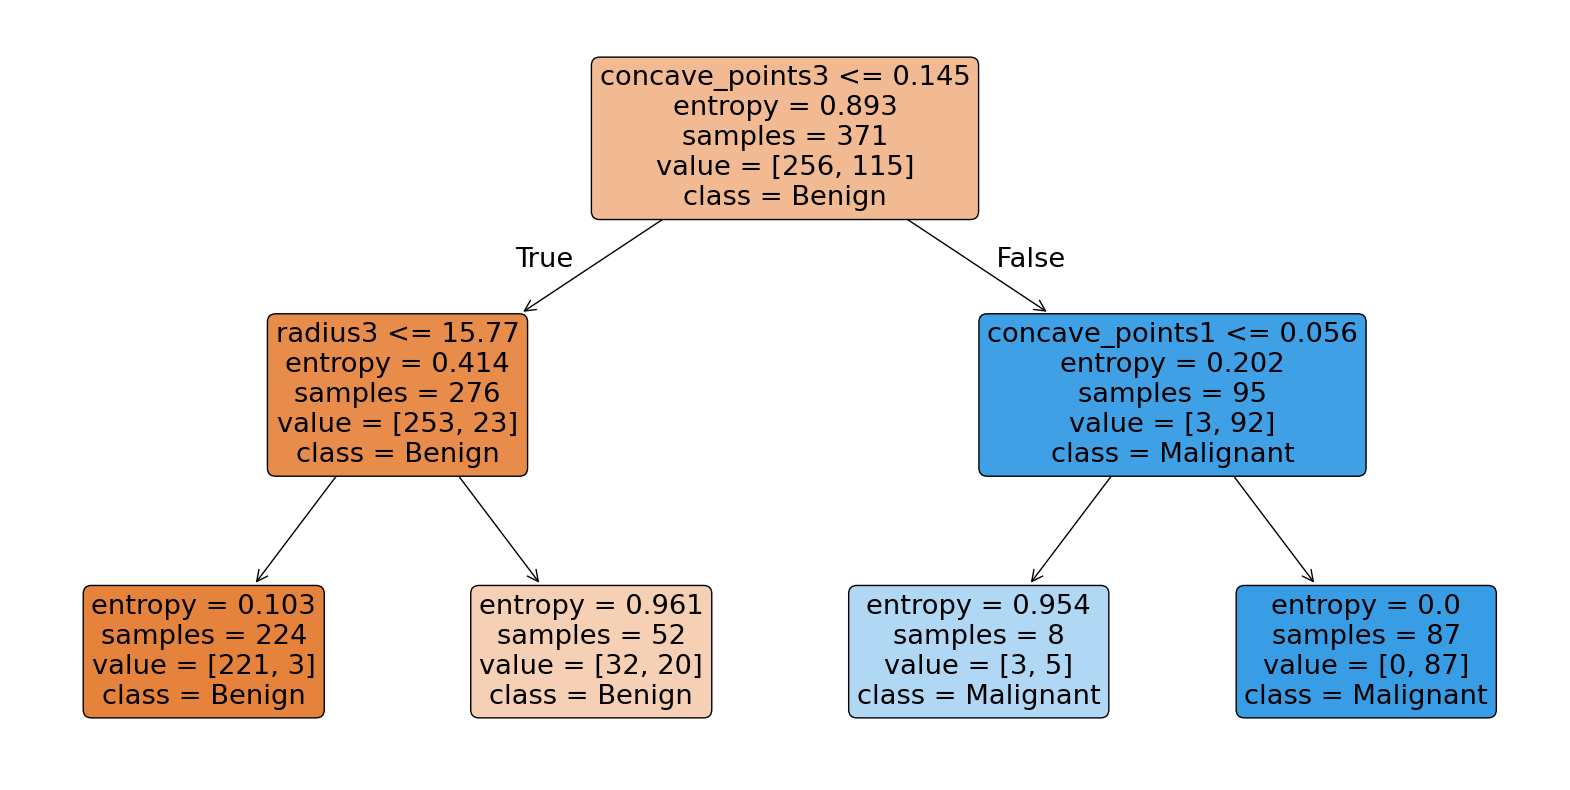

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(tuned_dt, filled=True, feature_names=Xtrain.columns, class_names=["Benign", "Malignant"], rounded=True)
plt.show()

We replotted the decision tree after tuning to be able to visualise the effect of the tuning. As seen in the figure, the tuning has made the tree far less deep and overall less complex, improving the figures interpretability.

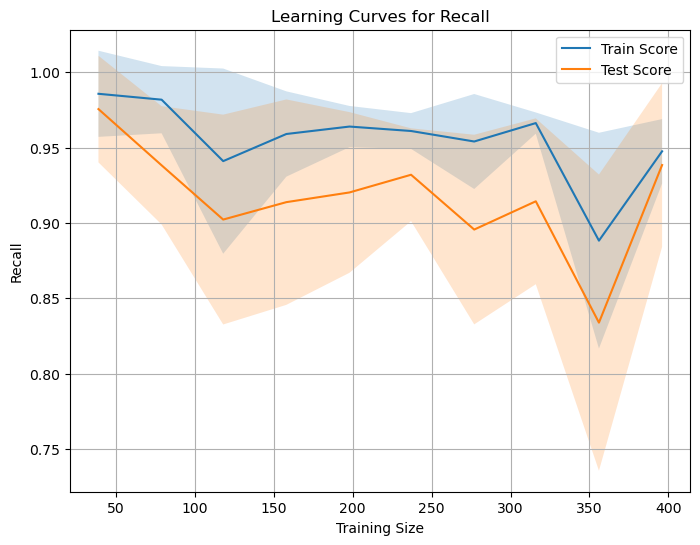

In [33]:
# plot the learning curve for the tuned decision tree
tuned_pipeline = Pipeline([("scalar", StandardScaler()), ("classifier", tuned_dt)])

train_sizes, train_scores, test_scores = learning_curve(tuned_pipeline, final_features, target, cv=cv, scoring="recall", train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2)
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score")
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.2)
plt.xlabel("Training Size")
plt.ylabel("Recall")
plt.title("Learning Curves for Recall")
plt.legend(loc=1)
plt.grid()
plt.show()

Replotting the learning curves with the tuned data, it is evident to see that the train set overfitting issue has been solved, most likely due to limiting the depth of the tree, not allowing the classifier to perfectly imitate the train set pattern, and generalise better to unseen data. Furthermore, as seen in the plot, the lines for the test and train score begin to converge, showing that the model generalises well as the training set size increases.

In [34]:
tuned_cv_accuracy_scores = cross_validate(tuned_dt, final_features, target, cv=cv, scoring="accuracy", return_train_score=True)
accuracy_train = tuned_cv_accuracy_scores["train_score"]
accuracy_test = tuned_cv_accuracy_scores["test_score"]

tuned_cv_recall_scores = cross_validate(tuned_dt, final_features, target, cv=cv, scoring="recall", return_train_score=True)
recall_train = tuned_cv_recall_scores["train_score"]
recall_test = tuned_cv_recall_scores["test_score"]

tuned_cv_precision_scores = cross_validate(tuned_dt, final_features, target, cv=cv, scoring="precision", return_train_score=True)
precision_train = tuned_cv_precision_scores["train_score"]
precision_test = tuned_cv_precision_scores["test_score"]

print(f"Tuned Stratified KFold cross-validation:\n")
print(f"Accuracy scores:\nTrain\nMean: {np.mean(accuracy_train):.3f}, Standard Deviation: {np.std(accuracy_train):.3f}\nTest\nMean: {np.mean(accuracy_test):.3f}, Standard Deviation: {np.std(accuracy_test):.3f}\n")
print(f"Recall scores:\nTrain\nMean: {np.mean(recall_train):.3f}, Standard Deviation: {np.std(recall_train):.3f}\nTest\nMean: {np.mean(recall_test):.3f}, Standard Deviation: {np.std(recall_test):.3f}\n")
print(f"Precision scores:\nTrain\nMean: {np.mean(precision_train):.3f}, Standard Deviation: {np.std(precision_train):.3f}\nTest\nMean: {np.mean(precision_test):.3f}, Standard Deviation: {np.std(precision_test):.3f}")

Tuned Stratified KFold cross-validation:

Accuracy scores:
Train
Mean: 0.944, Standard Deviation: 0.010
Test
Mean: 0.925, Standard Deviation: 0.033

Recall scores:
Train
Mean: 0.948, Standard Deviation: 0.021
Test
Mean: 0.938, Standard Deviation: 0.054

Precision scores:
Train
Mean: 0.890, Standard Deviation: 0.033
Test
Mean: 0.853, Standard Deviation: 0.063


Tuning the data improved the test recall score significantly, rising from 0.889 to 0.938, whilst also lowering the train score from 1.0 to 0.948, showing that the model is now generalising to the data better, as it is no longer memorising the train set. However, the increase in test recall score has led to a decrease in the other metrics too with the test accuracy score decreasing from 0.931 to 0.925, whilst the train accuracy score dropped from 1.0 to 0.944. The test precision decreased from 0.901 to 0.853 (whilst the train score dropped from 1.0 to 0.890). Overall, for every metric, the train scores decreased as the model was no longer overfitting to the train set, however whilst the recall test score increases, the other metrics test scores decrease. Regardless, the recall score is the most important as we want to make sure we are misclassifying as little malignant cases as possible as they are potentially life threatening, whilst misclassifying benign cases at worst would lead to unnecessary tests, which would cause no physical harm. 

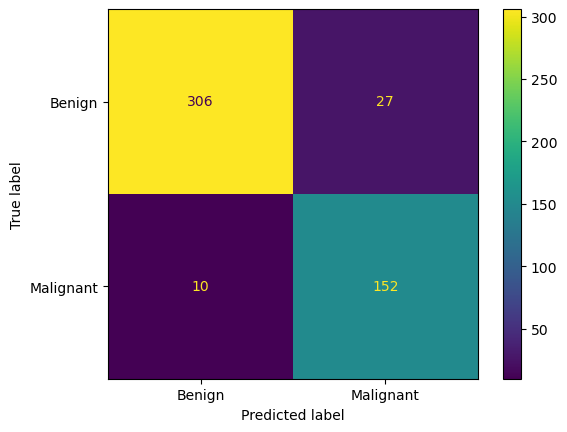

In [35]:
# produce confusion matrix for model after tuning
tuned_ypred_cv = cross_val_predict(tuned_dt, final_features, target, cv=cv)
tuned_cm_cv = metrics.confusion_matrix(target, tuned_ypred_cv)
disp_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=tuned_cm_cv, display_labels=["Benign", "Malignant"])
disp_cm.plot()

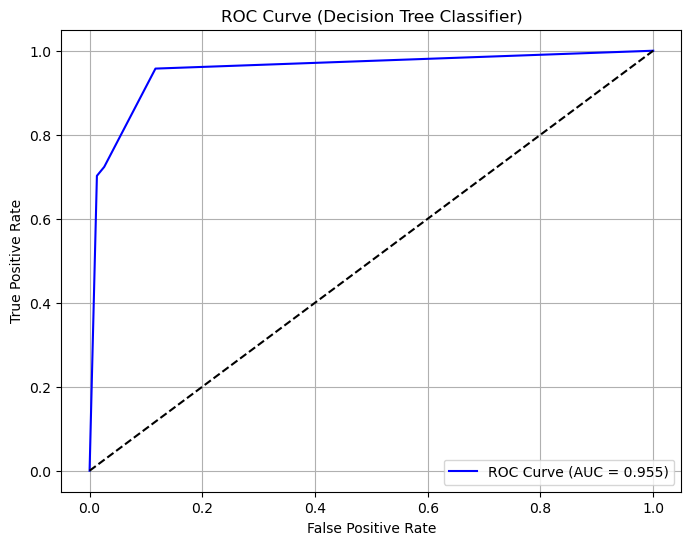

In [36]:
# produce roc curve for tuned decision tree
yprobs = tuned_dt.predict_proba(Xtest)[:, 1]

fpr, tpr, _ = roc_curve(ytest, yprobs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Decision Tree Classifier)")
plt.legend(loc=4)
plt.grid()
plt.show()

<hr style="border:2px solid gray">

## Conclusion:

In conclusion, we began by removing the following features: perimeter1, area1, perimeter2, area2, perimeter3, area3, compactness1, concavity1, compactness3, concavity3, fractal_dimension1, texture2, smoothness2, symmetry2, fractal_dimension2; as they either were strongly correlated with other features and therefore would have given very similar information, making them redundant, and leading to multicollinearity issues (can make it hard for the model to interpret which features are actually important), or were very weakly correlated to the target class, as features with low correlation to the target class have little to no linear relationship with the target class and therefore provide no help when attempting to distinguish between the two classes, often just producing noise. Initially struggled to generalise to the data, producing perfect test scores, indicating the overfitting of the model. However, whilst the model produces good inital test scores, accuracy: 0.879, recall: 0.830, precision: 0.848, these scores can be improved and the issue of overfitting the train data can be solved by applying a cross validation and performing hyperparameter tuning to prune the tree. First, we applied the stratified KFold cross-validation, improving the test scores to: 0.931 for accuracy (up from 0.879), 0.889 for recall (up from 0.830), and 0.901 for precision (up from 0.848). However, the train scores remained perfect, indicating the issue of overfitting was still prevalent. To solve this we carried out a grid search to find the best recall score. We chose the recall score as we want to make sure we are misclassifying as little malignant cases as possible as they are potentially life threatening. We found the best recall score was 0.938 for the following parameter: criterion: entropy, max_depth: 2, min_samples_leaf: 1, min_samples_split: 2. Whilst this produced the best recall score, the test accuracy and precision fell to 0.925 and 0.853, respectively. However, as we discussed, the recall score is the most important as want to make sure we are misclassifying as little malignant cases as possible, whereas misclassifying benign cases at worst would lead to unnecessary tests, which would cause no physical harm. Additionally, after applying the grid search the lines for the test and train scores converge together, indicating that the model is now fitting better to unseen data than initially. 

The model could be improved by further refining of hyperparameter tuning, exploring a larger range of different variables. Furthermore, feature engineering/selection could help improve the model with techniques such as tree-based feature importance, which measures the relative importance of each feature. Finally, a random forest could help by utilising many decsion trees to reduce overfitting and variance. 